<a href="https://colab.research.google.com/github/sc10/My-Projects/blob/main/Resume_Selector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nltk

In [2]:
pip install gensim

In [3]:
pip install wordcloud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
resume_df=pd.read_csv('resume.csv',encoding='latin-1')

In [7]:
resume_df=resume_df[['resume_text','class']]
resume_df.head()
resume_df.tail()

,resume_text,class
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged
124,\rResearch and Development Scientist - Burling...,not_flagged


In [8]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [9]:
resume_df.isnull().sum()

resume_text    0
class          0
dtype: int64

In [10]:
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [11]:
resume_df['class'] =resume_df['class'].apply(lambda x:1 if x=="flagged" else 0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
class_0=resume_df[resume_df['class']==0]
class_1=resume_df[resume_df['class']==1]

**Data Cleaning**

In [14]:
resume_df['resume_text']=resume_df['resume_text'].apply(lambda x: x.replace('\r',' '))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
arr=[]
if(input("Do you wanna add some flagged words ?(y/n): ") in ['y',"yes"]):
  ans="bla"
  while(ans!=""):
    ans=input("Enter a word (press enter to exit):")
    if(len(ans)>0):
      arr.append(ans)

stop_words.extend(arr)


Do you wanna add some flagged words ?(y/n): n


In [18]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
def preprocess(text):
  result =[]
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>2 and token not in stop_words:
      result.append(token)
  return ' '.join(result)

In [21]:
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

In [22]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog company south burlington email com aecf work experience customer service supervisor tier isabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information proofreading administrative assistant events coordinator office services assistant eileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging as

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


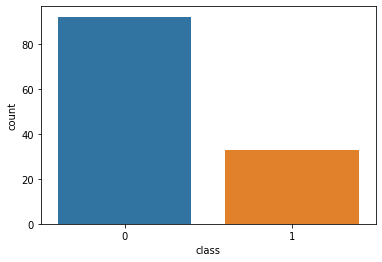

In [26]:
sns.countplot(resume_df['class'],label ='Count Plot')

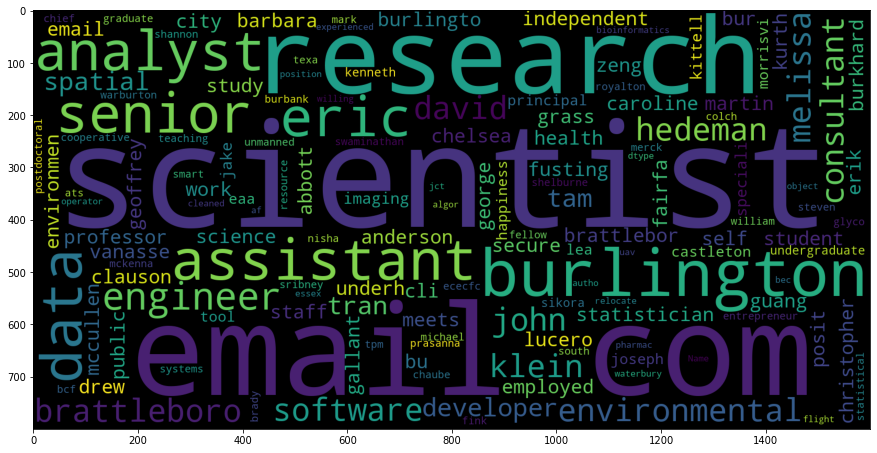

In [30]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words = 2000, width =1600, height = 800, stopwords=stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))
plt.imshow(wc)

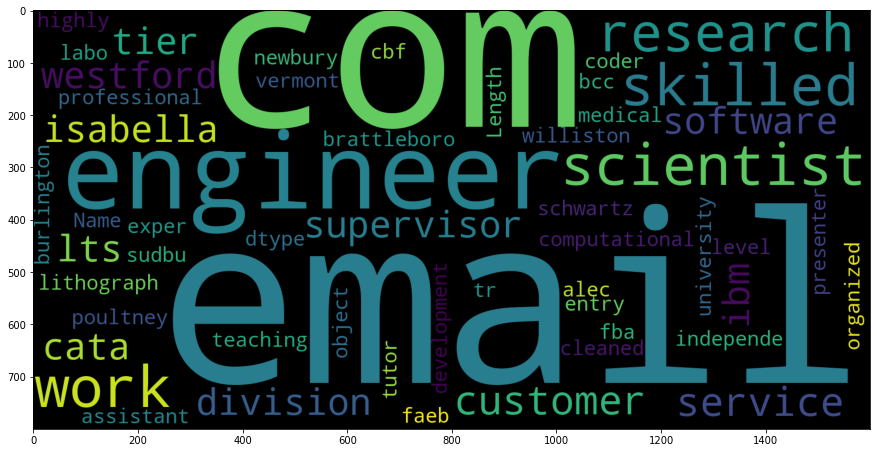

In [31]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words = 2000, width =1600, height = 800, stopwords=stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))
plt.imshow(wc)

**Prepare data using count vectorization**

Converting sentences to vectors, so that we can train the model

In [33]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

In [34]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(sample_data)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [35]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


**Applying it to cleaned data**

In [36]:
vectorizer=CountVectorizer()
countvect=vectorizer.fit_transform(resume_df['cleaned'])

In [38]:
print(vectorizer.get_feature_names())

['aaalac', 'aabb', 'aac', 'aacn', 'aacr', 'aacrjournals', 'aakeroõ_y', 'aanpcp', 'aaron', 'aas', 'abbott', 'abdomen', 'abdominal', 'abdul', 'aberdeen', 'abi', 'abilities', 'ability', 'abiotic', 'able', 'abnormal', 'aboard', 'abosalem', 'abraham', 'abreast', 'abs', 'absence', 'absorbance', 'abstract', 'abstracted', 'abstracts', 'abualrub', 'abundance', 'abureehan', 'abuse', 'academia', 'academic', 'academics', 'academy', 'acadia', 'acaeefbc', 'accelerate', 'accelerated', 'accept', 'acceptability', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accession', 'accident', 'accidents', 'accolateî', 'accommodations', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'accounts', 'accreditation', 'accredited', 'accrual', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accustomed', 'acetylsalic

In [39]:
print(countvect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
X=countvect

In [44]:
y=resume_df['class']

In [45]:
X.shape

(125, 10389)

In [46]:
y.shape

(125,)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [48]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

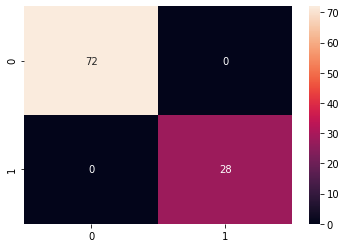

In [50]:
y_predict_train=NB_classifier.predict(X_train)
y_predict_train
cm=confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot=True)

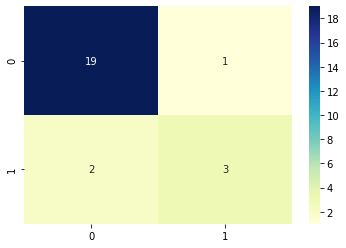

In [54]:
y_predict_test=NB_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [55]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.75      0.60      0.67         5

    accuracy                           0.88        25
   macro avg       0.83      0.77      0.80        25
weighted avg       0.87      0.88      0.87        25

